# Predict ddG

In [1]:
from spurs.inference import get_SPURS, parse_pdb
# ~ 10s
ckpt_path = './data/checkpoints/spurs'
model, cfg = get_SPURS(ckpt_path)
pdb_name = '1qlh'
pdb_path = '/nethome/zli3161/DATA-nash/SPURS/data/enzyme/1qlh.pdb'
chain = 'A'
pdb = parse_pdb(pdb_path, pdb_name, chain, cfg)
# ~ 1s
ddg = model(pdb,return_logist=True).cpu().detach()

/nethome/zli3161/DATA-nash/miniconda3/envs/spurs/lib/python3.7/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /work/ziang/miniconda3/envs/spurs/lib/python3.7/site-packages/torchvision/image.so: undefined symbol: _ZN3c104impl8GPUTrace13gpuTraceStateE
  warn(f"Failed to load image Python extension: {e}")


# ESM Score

In [2]:
import esm
import torch
from spurs.functional_site_annotation import get_mask_results

ckpt = './data/checkpoints/esm1v_t33_650M_UR90S_1/esm1v_t33_650M_UR90S_1.pt'
model, alphabet = esm.pretrained.load_model_and_alphabet_local(ckpt)
batch_converter = alphabet.get_batch_converter()
model.eval()  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)



/nethome/zli3161/DATA-nash/miniconda3/envs/spurs/lib/python3.7/site-packages/esm/pretrained.py:216: UserWarning: Regression weights not found, predicting contacts will not produce correct results.
  "Regression weights not found, predicting contacts will not produce correct results."


In [3]:
mut_index = list(range(2,376))
'''
 mut_idx here is how the original_sequence aligned with the pdb['seq]
 for example, the original_sequence here is 'MSTAGKVIK...'
 and the pdb['seq'] is 'STAGKVIKCK...'
 so here original_sequence[2-1:376-1] shoudl align with pdb['seq']
'''


original_sequence =  'MSTAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGICRSDDHVVSGTLVTPLPVIAGHEAAGIVESIGEGVTTVRPGDKVIPLFTPQCGKCRVCKHPEGNFCLKNDLSMPRGTMQDGTSRFTCRGKPIHHFLGTSTFSQYTVVDEISVAKIDAASPLEKVCLIGCGFSTGYGSAVKVAKVTQGSTCAVFGLGGVGLSVIMGCKAAGAARIIGVDINKDKFAKAKEVGATECVNPQDYKKPIQEVLTEMSNGGVDFSFEVIGRLDTMVTALSCCQEAYGVSVIVGVPPDSQNLSMNPMLLLSGRTWKGAIFGGFKSKDSVPKLVADFMAKKFALDPLITHVLPFEKINEGFDLLRSGESIRTILTF'
mask_results = get_mask_results(original_sequence,mut_index,original_sequence,batch_converter,model,device,alphabet).cpu().detach()

torch.Size([374, 1]) torch.Size([374, 20])


# Regression using sigmoid

In [4]:
from spurs.functional_site_annotation import get_sigmoid_results

result = get_sigmoid_results(mask_results,ddg)

torch.Size([7480]) torch.Size([7480]) torch.Size([7480])


# Functional Sites

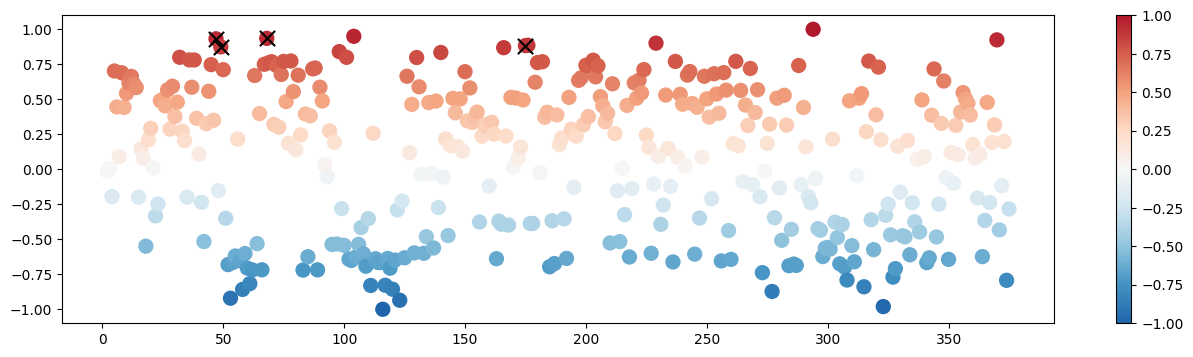

In [5]:
from spurs.functional_site_annotation import plot_sigmoid_results
shift = 2
vcenter = 0
highlight_positions =[49] +[47,68,175]
plot_sigmoid_results(result,shift,vcenter,highlight_positions)